# Experiment - 1 (Simple Linear Regression)

Name : Shruti Hore

PRN : 24070126172



# Simple Linear Regression
---

**Simple Linear Regression** is a type of regression algorithm that models the relationship between a **dependent variable** and a **single independent variable**.

**Key Characteristics**
- Represents the relationship using a **straight (sloped) line**
- **Dependent variable** must be **continuous / real-valued**
- **Independent variable** can be **continuous or categorical**

**Main Objectives**
- To **model the relationship** between two variables  
- To **forecast / predict** new observations

**Mathematical Equation**

y = mx + c

Where :
- **m** -> slope of the line (change in y with respect to x)
- **c** -> intercept  
- **x** -> independent variable (input)  
- **y** -> dependent variable (predicted output)


**Problem Statment**

The goal of this problem is to find if there is any correlation between the two variables, salary (dependent) and experience (independent).

We will find the best line with least number of errors.


Here,

Experience -> input

Salary -> output

# 1. Data Preprocessing

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Linear Regression model and train-test-split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the dataset
dataset = pd.read_csv('(1) Salary_Data.csv')

In [3]:
# Display first 5 rows
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
# Display last 5 rows
dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [5]:
# Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
# Statistical summary of the dataset
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# 2. Splitting Dataset into Training and Testing Sets

In [7]:
# Separating independent (X) and dependent (y) variables
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

# Splitting data into training and testing sets (80%-20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Why splitting into training and testing dataset?
- Training data is used to build the model and Testing data is used to evluate model performance.

# 3. Fitting the Simple Linear Regression


In [8]:
# Creating an object (regressor)
regressor = LinearRegression()

# Training the model
regressor.fit(x_train, y_train)

LinearRegression()

# 4. Visualization

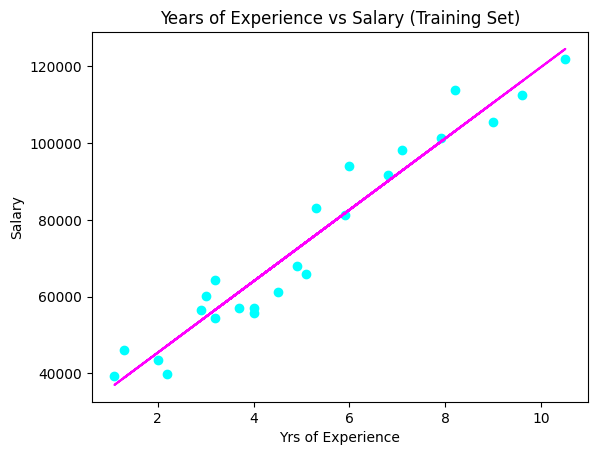

In [9]:
# Plotting the training set
plt.scatter(x_train, y_train, color='cyan')

# Plotting regression line
plt.plot(x_train, regressor.predict(x_train), color='magenta')
plt.title('Years of Experience vs Salary (Training Set)')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.show()

# 5. Prediction

In [10]:
# Predicting salary for test data
y_pred = regressor.predict(x_test)

# Predicting salary for training data
x_pred = regressor.predict(x_train)

In [11]:
# Actual test values
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [12]:
# Predicted test values
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431])

In [13]:
print(regressor.score(x_test, y_test))

0.988169515729126


# 6. Evaluation Metrices for Regression

- In regression analysis, error metrics are used to evaluate how well a model’s predictions match the actual values.  


- They quantify the difference between the true output and the predicted output.


  

# Mean Absolute Error (MAE)

MAE is the average of the absolute differences between actual and predicted values.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**Where:**  
- y_i = actual value  
- ŷ_i = predicted value  
- n = number of observations  

**Why use MAE:**  
- Easy to interpret  
- Same unit as the target variable (Salary)  
- Treats all errors equally  


In [22]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, x_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("\nMAE (Mean Absolute Error)")
print("Train MAE:", mae_train)
print("Test  MAE:", mae_test)


MAE (Mean Absolute Error)
Train MAE: 5221.078554315732
Test  MAE: 2446.1723690465055


# Mean Squared Error (MSE)
- it measures the square root of the average discrepancies between a dataset's actual values and projected values

MSE is the average of the squared differences between actual and predicted values.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Why use MSE:**  
- Penalizes large errors more  
- Smooth and differentiable (useful for optimization)



In [23]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, x_pred)
mse_test = mean_squared_error(y_test, y_pred)

print("\nMSE (Mean Squared Error)")
print("Train MSE:", mse_train)
print("Test  MSE:", mse_test)


MSE (Mean Squared Error)
Train MSE: 36149670.11816131
Test  MSE: 12823412.298126549


# R² Score (Coefficient of Determination)

R² measures how well the regression model explains the variance in the data.

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

**Where:**  
- y_i = actual values  
- ŷ_i = predicted values  
- ȳ = mean of actual values

**Range of R²:**  
- 1 → perfect fit  
- 0 → no better than predicting the mean  
- < 0 → worse than predicting the mean  

**Why use R²:**  
- Indicates goodness of fit  
- Easy to compare regression models

In [24]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, x_pred)
r2_test = r2_score(y_test, y_pred)

print("\nR² Score")
print("Train R²:", r2_train)
print("Test  R²:", r2_test)


R² Score
Train R²: 0.9411949620562126
Test  R²: 0.988169515729126


# Root Mean Square Error (RMSE)

RMSE is the square root of MSE.

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Why use RMSE:**  
- Same unit as the target variable (Salary)  
- Strongly penalizes large errors  
- More interpretable than MSE  

In [26]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("\nRMSE (Root Mean Squared Error)")
print("Train RMSE:", rmse_train)
print("Test  RMSE:", rmse_test)


RMSE (Root Mean Squared Error)
Train RMSE: 6012.459573099956
Test  RMSE: 3580.979237321343


# Visualization

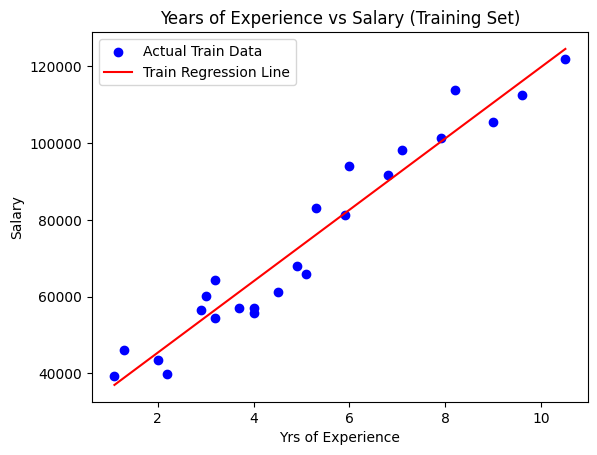

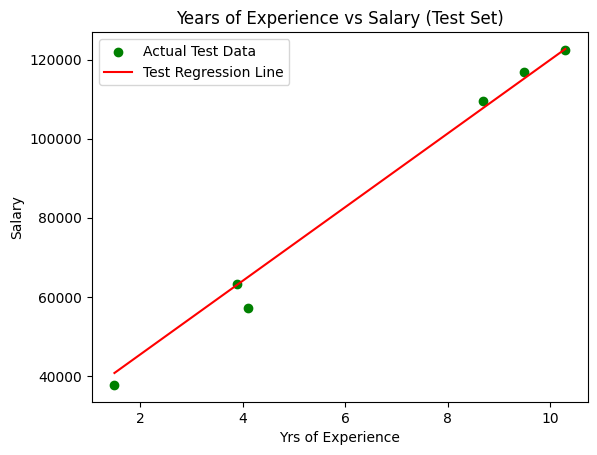

In [20]:
# Sort values for clean regression lines
x_train_sorted = np.sort(x_train, axis=0)
x_test_sorted = np.sort(x_test, axis=0)

y_pred_train_sorted = regressor.predict(x_train_sorted)
y_pred_test_sorted = regressor.predict(x_test_sorted)

# TRAIN PLOT
plt.scatter(x_train, y_train, color='blue', label='Actual Train Data')
plt.plot(x_train_sorted, y_pred_train_sorted, color='red', label='Train Regression Line')
plt.title('Years of Experience vs Salary (Training Set)')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# TEST PLOT
plt.scatter(x_test, y_test, color='green', label='Actual Test Data')
plt.plot(x_test_sorted, y_pred_test_sorted, color='red', label='Test Regression Line')
plt.title('Years of Experience vs Salary (Test Set)')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [21]:
print("\nModel Equation:")
print(f"Salary = {regressor.intercept_:.2f} + {regressor.coef_[0]:.2f} * YearsExperience")



Model Equation:
Salary = 26780.10 + 9312.58 * YearsExperience


**Conclusion:**

The Simple Linear Regression model successfully identifies a strong linear relationship between years of experience and salary, and it predicts salary values with high accuracy.
